## A) Loading Data And Directory

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os, time, logging
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
#import schedule

In [2]:
CURRENT_DIR = os.getcwd()
CURRENT_DATE = datetime.today().strftime('%d.%m.%Y')
GAIN_DIR = os.path.join(CURRENT_DIR, 'NSE_Gainer\\')
LOSS_DIR = os.path.join(CURRENT_DIR, 'NSE_Looser\\')
OUTPUT_DIR = os.path.join(CURRENT_DIR, 'NSE_Output_Images\\')
LOG_DIR = os.path.join(CURRENT_DIR, 'NSE_Logs\\')

In [3]:
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)
else:
    pass

log = LOG_DIR + time.strftime('Logs_%d.%m.%Y_%H.%M.%S.%p'+'.log')
logging.basicConfig(filename=log, level=logging.DEBUG, format='[%(asctime)s] : %(message)s', datefmt='%d/%m/%Y %H:%M:%S', filemode='w')

In [4]:
if not os.path.exists(GAIN_DIR):
    os.makedirs(GAIN_DIR)
    logging.debug(f'NSE_Gainer directory is created...')
else: 
    logging.debug(f'NSE_Gainer directory is exists...')
if not os.path.exists(LOSS_DIR):
    os.makedirs(LOSS_DIR)
    logging.debug(f'NSE_Looser directory is created...')
else:
    logging.debug(f'NSE_Looser directory is exists...')
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    logging.debug(f'NSE_Output_Images directory is created...')
else:
    logging.debug(f'NSE_Output_Images directory is exists...')

In [5]:
# NSE gainer (day, week, month)
TOP_GAINER_NSE_NIFTY50_DAY = 'https://money.rediff.com/gainers/nse/daily/nifty'
TOP_GAINER_NSE_NIFTY50_WEEK = 'https://money.rediff.com/gainers/nse/weekly/nifty'
TOP_GAINER_NSE_NIFTY50_MONTH = 'https://money.rediff.com/gainers/nse/monthly/nifty'

# NSE looser (day, week, month)
TOP_LOOSER_NSE_NIFTY50_DAY = 'https://money.rediff.com/losers/nse/daily/nifty'
TOP_LOOSER_NSE_NIFTY50_WEEK = 'https://money.rediff.com/losers/nse/weekly/nifty'
TOP_LOOSER_NSE_NIFTY50_MONTH = 'https://money.rediff.com/losers/nse/monthly/nifty'

In [6]:
# NSE gainer (day, week, month)
data_gainer_day = pd.read_html(TOP_GAINER_NSE_NIFTY50_DAY, header=0)
data_gainer_week = pd.read_html(TOP_GAINER_NSE_NIFTY50_WEEK, header=0)
data_gainer_month = pd.read_html(TOP_GAINER_NSE_NIFTY50_MONTH, header=0)
logging.debug(f'NSE NIFTY50 top gainer data is fetched...')

# NSE looser (day, week, month)
data_looser_day = pd.read_html(TOP_LOOSER_NSE_NIFTY50_DAY, header=0)
data_looser_week = pd.read_html(TOP_LOOSER_NSE_NIFTY50_WEEK, header=0)
data_looser_month = pd.read_html(TOP_LOOSER_NSE_NIFTY50_MONTH, header=0)
logging.debug(f'NSE NIFTY50 top looser data is fetched...')

## B) Data View , Clean And Save

### B-1) NSE NIFTY50 - _Top Gainer Data_

Top gainers are calculated by (Current Price - Opening Price) / Opening Price

#### i) Top Gainer Data - Daily basis

In [7]:
df_gainer_day = pd.DataFrame(data_gainer_day[0])
data_gainer_day[0][:15]
# OR data_gainer_day = data_gainer_day[0] # taking 1st element from list into dataframe

,Company,Prev Close (Rs),Current Price (Rs),% Change
0,Hindalco Indus.,453.95,465.20,2.48
1,Tech Mahindra,1521.95,1550.95,1.91
2,HDFC Life Insurance,702.60,715.50,1.84
3,Nestle India,18854.00,19104.40,1.33
4,Tata Consumer Produc,837.65,848.70,1.32
5,Adani Ports & Speci,735.10,743.50,1.14
6,Grasim Inds.,1844.35,1865.00,1.12
7,Wipro,641.80,648.85,1.10
8,Bharti Airtel,728.60,736.20,1.04
9,Bajaj Finserv Ltd.,17871.35,18052.85,1.02


In [8]:
# Saving the data to csv file
df_gainer_day.to_csv(GAIN_DIR + 'TopGainerDay_' + CURRENT_DATE + '.csv', index=False)
logging.debug(f'NSE NIFTY50 top daily gainer data csv saved...')

#### ii) Top Gainer Data - Weekly basis

In [9]:
df_gainer_week = pd.DataFrame(data_gainer_week[0])
data_gainer_week[0][:15]

,Company,Prev Close (Rs),Current Price (Rs),% Change


In [10]:
df_gainer_week['% Change'] = df_gainer_week['% Change'].str.replace(' ', "")

In [11]:
# Saving the data to csv file
df_gainer_week.to_csv(GAIN_DIR + 'TopGainerWeek_' + CURRENT_DATE + '.csv', index=False)
logging.debug(f'NSE NIFTY50 top weekly gainer data csv saved...')

#### iii) Top Gainer Data - Monthly basis

In [12]:
df_gainer_month = pd.DataFrame(data_gainer_month[0])
data_gainer_month[0][:15]

,Company,Prev Close (Rs),Current Price (Rs),% Change
0,Grasim Inds.,1677.05,1863.80,+ 11.14
1,L&T,1752.05,1942.00,+ 10.84
2,Tech Mahindra,1402.15,1553.60,+ 10.80
3,UltraTech Cement,7350.40,8052.00,+ 9.55
4,ICICI Bank,709.95,774.10,+ 9.04
5,Bharti Airtel,689.90,735.40,+ 6.60
6,SBI,481.70,508.30,+ 5.52
7,HDFC,2765.60,2915.80,+ 5.43
8,Shree Cement,27815.70,29209.95,+ 5.01
9,Kotak Mahindra Bank,2009.35,2070.05,+ 3.02


In [13]:
df_gainer_month['% Change'] = df_gainer_month['% Change'].str.replace(' ', "")

In [14]:
# Saving the data to csv file
df_gainer_month.to_csv(GAIN_DIR + 'TopLooserMonth_' + CURRENT_DATE + '.csv', index=False)
logging.debug(f'NSE NIFTY50 top monthly gainer data csv saved...')

### B-2) NSE NIFTY50 - _Top Looser Data_

#### i) Top Looser Data - Daily basis

In [15]:
df_looser_day = pd.DataFrame(data_looser_day[0])
data_looser_day[0][:15]

,Company,Prev Close (Rs),Current Price (Rs),% Change
0,Bajaj Auto Ltd.,3749.95,3714.3,-0.95
1,Tata Motors Ltd.,503.45,500.8,-0.53
2,NTPC,136.65,136.5,-0.11
3,UltraTech Cement,8050.65,8047.8,-0.04
4,Divi's Lab,4833.25,4832.0,-0.03


In [16]:
# Saving the data to csv file
df_looser_day.to_csv(LOSS_DIR + 'TopLooserDay_' + CURRENT_DATE + '.csv', index=False)
logging.debug(f'NSE NIFTY50 top daily looser data csv saved...')

#### ii) Top Looser Data - Weekly basis

In [17]:
df_looser_week = pd.DataFrame(data_looser_week[0])
data_looser_week[0][:15]

,Company,Prev Close (Rs),Current Price (Rs),% Change


In [18]:
df_looser_week['% Change'] = df_looser_week['% Change'].str.replace(' ', "")

In [19]:
# Saving the data to csv file
df_looser_week.to_csv(LOSS_DIR + 'TopLooserWeek_' + CURRENT_DATE + '.csv', index=False)
logging.debug(f'NSE NIFTY50 top weekly looser data csv saved...')

#### iii) Top Looser Data - Monthly basis

In [20]:
df_looser_month = pd.DataFrame(data_looser_month[0])
data_looser_month[0][:15]

,Company,Prev Close (Rs),Current Price (Rs),% Change
0,IndusInd Bank,1184.50,1031.90,-12.88
1,Coal India,190.05,167.45,-11.89
2,Hindustan Unilever L,2646.75,2384.85,-9.90
3,Hindalco Indus.,508.05,464.80,-8.51
4,Power Grid Corpo,199.40,182.85,-8.30
5,Divi's Lab,5248.90,4826.45,-8.05
6,Hero MotoCorp,2925.20,2693.85,-7.91
7,HCL Technologies,1265.35,1171.85,-7.39
8,ITC Ltd.,249.20,231.00,-7.30
9,Asian Paints Ltd.,3323.50,3084.80,-7.18


In [22]:
#df_looser_month['% Change'] = df_looser_month['% Change'].str.replace(' ', "")

In [23]:
# Saving the data to csv file
df_looser_month.to_csv(LOSS_DIR + 'TopLooserMonth_' + CURRENT_DATE + '.csv', index=False)
logging.debug(f'NSE NIFTY50 top monthly looser data csv saved...')

## C) Data Visualization With Exports

In [24]:
# Function to visualize and save to directory
def show_barplot(dataframe, n):
    dataframe = dataframe[:15]
    # Figure Size
    fig, ax = plt.subplots()

    # Horizontal Bar Plot
    ax.barh(dataframe['Company'], dataframe['% Change'])

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 4)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.4)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.05, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='black')

    # Add Plot Title, and labels
    ax.set_ylabel('Company')
    ax.set_xlabel('% Change')
    ax.set_title('Company and % Change',loc ='left')

    # Add Text watermark
    fig.text(0.9, 0.9, 'github.com/kunalk3', fontsize = 10, color ='grey', ha ='right', va ='bottom', alpha = 0.5)

    # Show Plot
    if n == 1:
        plt.savefig(OUTPUT_DIR + 'DailyTopGainer_' + CURRENT_DATE + '.png', bbox_inches='tight')
    elif n == 2:
        plt.savefig(OUTPUT_DIR + 'MonthlyTopGainer_' + CURRENT_DATE + '.png', bbox_inches='tight')
    elif n == 3:
        plt.savefig(OUTPUT_DIR + 'WeeklyTopGainer_' + CURRENT_DATE + '.png', bbox_inches='tight')
    elif n == 4:
        plt.savefig(OUTPUT_DIR + 'DailyTopLooser_' + CURRENT_DATE + '.png', bbox_inches='tight')
    elif n == 5:
        plt.savefig(OUTPUT_DIR + 'WeeklyTopLooser_' + CURRENT_DATE + '.png', bbox_inches='tight')
    elif n == 6:
        plt.savefig(OUTPUT_DIR + 'MonthlyTopLooser_' + CURRENT_DATE + '.png', bbox_inches='tight')
    plt.show()
    

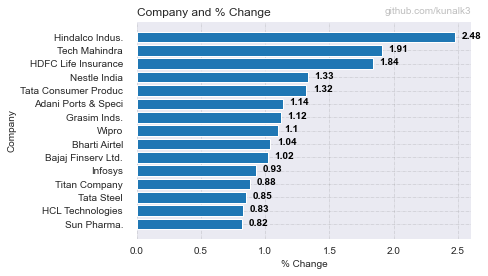

In [25]:
# Visualize and save top gainer (Day)
show_barplot(df_gainer_day, n=1)
logging.debug(f'Daily gainer graph is exported...')

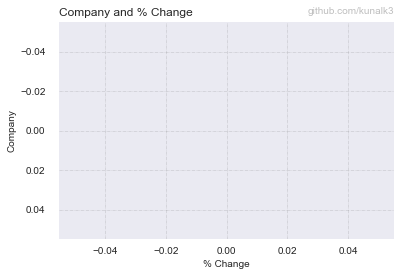

In [26]:
# Visualize and save top gainer (week)
show_barplot(df_gainer_week, n=2)
logging.debug(f'Weekly gainer graph is exported...')

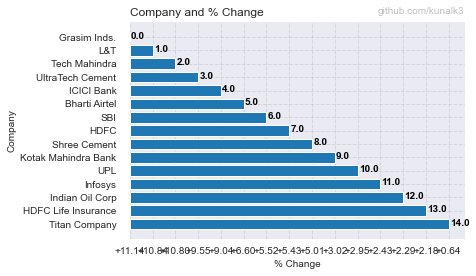

In [27]:
# Visualize and save top gainer (month)
show_barplot(df_gainer_month, n=3)
logging.debug(f'Monthly gainer graph is exported...')

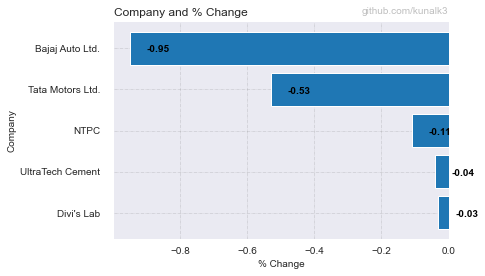

In [28]:
# Visualize and save top looser (Day)
show_barplot(df_looser_day, n=4)
logging.debug(f'Daily looser graph is exported...')

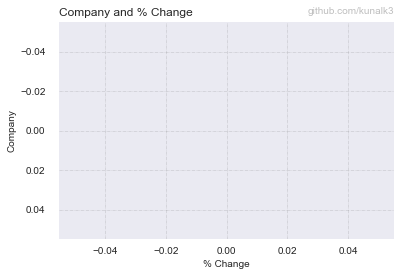

In [29]:
# Visualize and save top looser (week)
show_barplot(df_looser_week, n=5)
logging.debug(f'Weekly looser graph is exported...')

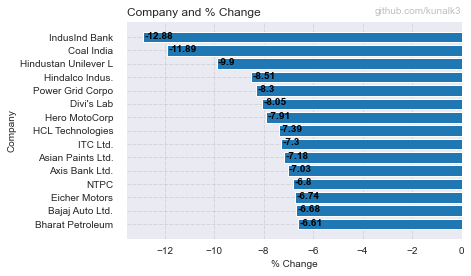

In [30]:
# Visualize and save top looser (month)
show_barplot(df_looser_month, n=6)
logging.debug(f'Monthly looser graph is exported...')